<font color="yellow" size="6">Outliers</font>
<p><font color="GREEN" size="4">5.Modified Z-Score</font>

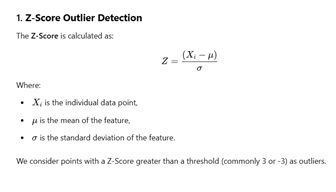

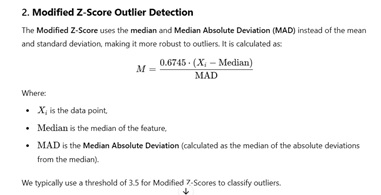

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features (Z-Score and Modified Z-Score work better on standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z-Score Calculation: The Z-Score is computed for each feature, and we check if any feature has a Z-Score greater than 3 (threshold), which is commonly used to define an outlier.

In [2]:
# ------------------------ Z-Score Outlier Detection ------------------------
# Compute Z-Scores
z_scores = np.abs(X_scaled)  # Taking the absolute values of z-scores

# Define a threshold for outliers (commonly 3 or -3)
z_threshold = 3
z_outliers = np.any(z_scores > z_threshold, axis=1)

print(f"Number of outliers detected using Z-Score: {np.sum(z_outliers)}")

Number of outliers detected using Z-Score: 1


Modified Z-Score Calculation: For each feature, the Modified Z-Score is computed using the median and MAD. Points with a Modified Z-Score greater than 3.5 are considered outliers.

In [3]:
# ------------------------ Modified Z-Score Outlier Detection ------------------------
# Function to calculate MAD (Median Absolute Deviation)
def mad(x):
    return np.median(np.abs(x - np.median(x)))
# Calculate the modified Z-Score
modified_z_scores = np.zeros(X_scaled.shape)
for i in range(X_scaled.shape[1]):
    feature = X_scaled[:, i]
    median = np.median(feature)
    mad_value = mad(feature)
    modified_z_scores[:, i] = 0.6745 * (feature - median) / mad_value

In [4]:
# Define a threshold for outliers (commonly 3.5)
modified_z_threshold = 3.5
modified_z_outliers = np.any(np.abs(modified_z_scores) > modified_z_threshold, axis=1)

print(f"Number of outliers detected using Modified Z-Score: {np.sum(modified_z_outliers)}")

Number of outliers detected using Modified Z-Score: 0


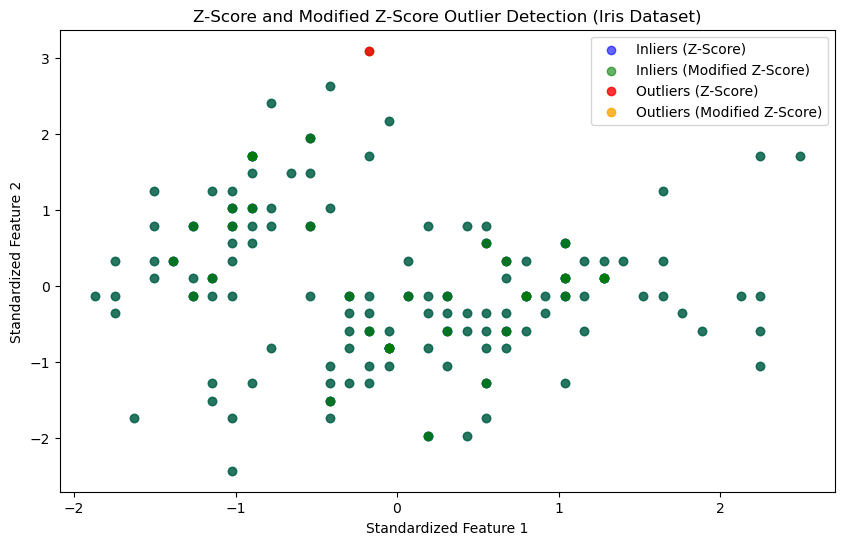

In [5]:
# ------------------------ Visualization ------------------------
# Visualizing the first two features for simplicity
plt.figure(figsize=(10, 6))

# Plot inliers (points classified as inliers)
plt.scatter(X_scaled[~z_outliers, 0], X_scaled[~z_outliers, 1], color='blue', label='Inliers (Z-Score)', alpha=0.6)
plt.scatter(X_scaled[~modified_z_outliers, 0], X_scaled[~modified_z_outliers, 1], color='green', label='Inliers (Modified Z-Score)', alpha=0.6)

# Plot outliers (points classified as outliers)
plt.scatter(X_scaled[z_outliers, 0], X_scaled[z_outliers, 1], color='red', label='Outliers (Z-Score)', alpha=0.8)
plt.scatter(X_scaled[modified_z_outliers, 0], X_scaled[modified_z_outliers, 1], color='orange', label='Outliers (Modified Z-Score)', alpha=0.8)

plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend()
plt.title('Z-Score and Modified Z-Score Outlier Detection (Iris Dataset)')
plt.show()

Key Notes:
Z-Score: This method is sensitive to the mean and standard deviation, meaning that it can be influenced by extreme values. It works well when the data follows a normal distribution.
Modified Z-Score: This method is more robust because it uses the median and MAD, making it less sensitive to extreme values. It is often preferred when the dataset contains outliers or is not normally distributed.
Thresholds: The thresholds (3 for Z-Score and 3.5 for Modified Z-Score) are commonly used, but they can be adjusted depending on the dataset and the proportion of outliers you expect.